In [295]:
import pandas as pd
import re
import numpy as np
import re
import pycountry

QJE_SCOPUS = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/Scopus/QJE_SCOPUS.xlsx')
QJE_SCOPUS_filtered = QJE_SCOPUS[['year','affiliations']]
QJE_SCOPUS_filtered.head()

# create a pattern that will match any country in pycountry.countries
names = '|'.join([country.name for country in pycountry.countries])
pattern = re.compile(names, re.UNICODE | re.IGNORECASE)

QJE_SCOPUS_filtered = QJE_SCOPUS_filtered.replace(np.nan, '', regex=True)

for i in range(len(QJE_SCOPUS_filtered)):
    x = QJE_SCOPUS_filtered.iat[i,1]
    #companies = ['XGLOW Japan', 'GOGO China', 'DALO germany', 'XTTTIndia']

    # apply sub for each company
    QJE_SCOPUS_filtered.iat[i,1] = pattern.sub("", x).strip()
    #print(QJE_SCOPUS_filtered.iat[i,1])

print(QJE_SCOPUS_filtered.tail())

#Creating a new line split in the data
list = QJE_SCOPUS_filtered.affiliations.str.split("\n", expand = True)
QJE_SCOPUS_filtered['aff1'] = list[0]
QJE_SCOPUS_filtered['aff2'] = list[1] 
QJE_SCOPUS_filtered['aff3'] = list[2] 
QJE_SCOPUS_filtered['aff4'] = list[3] 
QJE_SCOPUS_filtered['aff5'] = list[4] 
QJE_SCOPUS_filtered['aff6'] = list[5] 
QJE_SCOPUS_filtered['aff7'] = list[6] 
QJE_SCOPUS_filtered.tail()


      year                                       affiliations
3159  2016                                   Yale University,
3160  2016  a--University of California, Berkeley, Nationa...
3161  2016  a--Center for Macroeconomic Research, Universi...
3162  2016  a--Free University of Bolzano, \nb--Institut d...
3163  2016  a--NBER, \nb--UC Berkeley, \nc--Northwestern U...


,year,affiliations,aff1,aff2,aff3,aff4,aff5,aff6,aff7
3159,2016,"Yale University,","Yale University,",None,None,None,None,None,None
3160,2016,"a--University of California, Berkeley, Nationa...","a--University of California, Berkeley, Nationa...","b--University of Michigan, National Bureau of ...",None,None,None,None,None
3161,2016,"a--Center for Macroeconomic Research, Universi...","a--Center for Macroeconomic Research, Universi...","b--University of Mannheim, École Polytechnique,",None,None,None,None,None
3162,2016,"a--Free University of Bolzano, \nb--Institut d...","a--Free University of Bolzano,","b--Institut d'Economia de Barcelona, Universit...","c--CREI, Universitat Pompeu Fabra,","d--Barcelona GSE,",None,None,None
3163,2016,"a--NBER, \nb--UC Berkeley, \nc--Northwestern U...","a--NBER,","b--UC Berkeley,","c--Northwestern University,",None,None,None,None


In [296]:
import numpy as np
QJE_SCOPUS_filtered = QJE_SCOPUS_filtered.replace(np.nan, '', regex=True)

#Removing the a--,b--,c-- and d-- as well as Stripping leading space and putting in title case
for i in range(len(QJE_SCOPUS_filtered)):
    QJE_SCOPUS_filtered.iat[i,2] = QJE_SCOPUS_filtered.iat[i,2].replace("a--","").strip().title()
    QJE_SCOPUS_filtered.iat[i,2] = QJE_SCOPUS_filtered.iat[i,2].rstrip(',')

    QJE_SCOPUS_filtered.iat[i,3] = QJE_SCOPUS_filtered.iat[i,3].replace("b--","").strip().title()
    QJE_SCOPUS_filtered.iat[i,3] = QJE_SCOPUS_filtered.iat[i,3].rstrip(',')

    QJE_SCOPUS_filtered.iat[i,4] = QJE_SCOPUS_filtered.iat[i,4].replace("c--","").strip().title()
    QJE_SCOPUS_filtered.iat[i,4] = QJE_SCOPUS_filtered.iat[i,4].rstrip(',')

    QJE_SCOPUS_filtered.iat[i,5] = QJE_SCOPUS_filtered.iat[i,5].replace("d--","").strip().title()
    QJE_SCOPUS_filtered.iat[i,5] = QJE_SCOPUS_filtered.iat[i,5].rstrip(',')

    QJE_SCOPUS_filtered.iat[i,6] = QJE_SCOPUS_filtered.iat[i,6].replace("e--","").strip().title()
    QJE_SCOPUS_filtered.iat[i,6] = QJE_SCOPUS_filtered.iat[i,6].rstrip(',')

    QJE_SCOPUS_filtered.iat[i,7] = QJE_SCOPUS_filtered.iat[i,7].replace("f--","").strip().title()
    QJE_SCOPUS_filtered.iat[i,7] = QJE_SCOPUS_filtered.iat[i,7].rstrip(',')

QJE_SCOPUS_filtered.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/QJE_SCOPUS_filtered.xlsx')


In [297]:
#Splitting the first affiliation into multiple columns based on an and

list = QJE_SCOPUS_filtered.aff1.str.split(", ", expand = True)
print(list.shape)
QJE_SCOPUS_filtered = QJE_SCOPUS_filtered.replace(np.nan, '', regex=True)
QJE_SCOPUS_filtered['aff11'] = list[0]
QJE_SCOPUS_filtered['aff12'] = list[1] 
QJE_SCOPUS_filtered['aff13'] = list[2] 
QJE_SCOPUS_filtered['aff14'] = list[3] 
QJE_SCOPUS_filtered['aff15'] = list[4] 
QJE_SCOPUS_filtered['aff16'] = list[5] 
QJE_SCOPUS_filtered['aff17'] = list[6] 
#QJE_SCOPUS_filtered.tail()

for i in range(len(QJE_SCOPUS_filtered['aff11'])):
    if QJE_SCOPUS_filtered['aff11'].iat[i] is not None:
        if len(QJE_SCOPUS_filtered['aff11'].iat[i].strip()) < 3:
            QJE_SCOPUS_filtered['aff11'].iat[i] = ''

for i in range(len(QJE_SCOPUS_filtered['aff12'])):
    if QJE_SCOPUS_filtered['aff12'].iat[i] is not None:
        if len(QJE_SCOPUS_filtered['aff12'].iat[i].strip()) < 3:
            QJE_SCOPUS_filtered['aff12'].iat[i] = ''

for i in range(len(QJE_SCOPUS_filtered['aff13'])):
    if QJE_SCOPUS_filtered['aff13'].iat[i] is not None:
        if len(QJE_SCOPUS_filtered['aff13'].iat[i]) < 3:
            QJE_SCOPUS_filtered['aff13'].iat[i] = ''

#for i in range(len(list)):
 #   if list.iat[i,1] is not None:
  #      if len(list.iat[i,1]) < 4:
   #         QJE_SCOPUS_filtered['aff12'].iat[i] = ''

#QJE_SCOPUS_filtered.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/QJE_SCOPUS_filtered2.xlsx')

(3164, 9)


In [298]:
list = QJE_SCOPUS_filtered.aff2.str.split(", ", expand = True)
print(list.shape)
QJE_SCOPUS_filtered = QJE_SCOPUS_filtered.replace(np.nan, '', regex=True)
QJE_SCOPUS_filtered['aff21'] = list[0]
QJE_SCOPUS_filtered['aff22'] = list[1] 
QJE_SCOPUS_filtered['aff23'] = list[2] 
QJE_SCOPUS_filtered['aff24'] = list[3] 
QJE_SCOPUS_filtered['aff25'] = list[4] 
QJE_SCOPUS_filtered['aff26'] = list[5] 
QJE_SCOPUS_filtered['aff27'] = list[6] 
#QJE_SCOPUS_filtered.tail()

for i in range(len(QJE_SCOPUS_filtered['aff21'])):
    if QJE_SCOPUS_filtered['aff21'].iat[i] is not None:
        if len(QJE_SCOPUS_filtered['aff21'].iat[i].strip()) < 3:
            QJE_SCOPUS_filtered['aff21'].iat[i] = ''

for i in range(len(QJE_SCOPUS_filtered['aff22'])):
    if QJE_SCOPUS_filtered['aff22'].iat[i] is not None:
        if len(QJE_SCOPUS_filtered['aff22'].iat[i].strip()) < 3:
            QJE_SCOPUS_filtered['aff22'].iat[i] = ''

for i in range(len(QJE_SCOPUS_filtered['aff23'])):
    if QJE_SCOPUS_filtered['aff23'].iat[i] is not None:
        if len(QJE_SCOPUS_filtered['aff23'].iat[i].strip()) < 3:
            QJE_SCOPUS_filtered['aff23'].iat[i] = ''

#for i in range(len(list)):
 #   if list.iat[i,1] is not None:
  #      if len(list.iat[i,1]) < 4:
   #         QJE_SCOPUS_filtered['aff12'].iat[i] = ''

QJE_SCOPUS_filtered.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/QJE_SCOPUS_filtered2.xlsx')

(3164, 7)


In [299]:
list = QJE_SCOPUS_filtered.aff3.str.split(", ", expand = True)
print(list.shape)
QJE_SCOPUS_filtered = QJE_SCOPUS_filtered.replace(np.nan, '', regex=True)
QJE_SCOPUS_filtered['aff31'] = list[0]
QJE_SCOPUS_filtered['aff32'] = list[1] 
QJE_SCOPUS_filtered['aff33'] = list[2] 
QJE_SCOPUS_filtered['aff34'] = list[3] 
QJE_SCOPUS_filtered['aff35'] = list[4] 
QJE_SCOPUS_filtered['aff36'] = list[5] 
QJE_SCOPUS_filtered['aff37'] = list[6] 
#QJE_SCOPUS_filtered.tail()

for i in range(len(QJE_SCOPUS_filtered['aff31'])):
    if QJE_SCOPUS_filtered['aff31'].iat[i] is not None:
        if len(QJE_SCOPUS_filtered['aff31'].iat[i].strip()) < 3:
            QJE_SCOPUS_filtered['aff31'].iat[i] = ''
    else:
        QJE_SCOPUS_filtered['aff31'].iat[i] = ''

for i in range(len(QJE_SCOPUS_filtered['aff32'])):
    if QJE_SCOPUS_filtered['aff32'].iat[i] is not None:
        if len(QJE_SCOPUS_filtered['aff32'].iat[i].strip()) < 3:
            QJE_SCOPUS_filtered['aff32'].iat[i] = ''
    else:
        QJE_SCOPUS_filtered['aff32'].iat[i] = ''

for i in range(len(QJE_SCOPUS_filtered['aff33'])):
    if QJE_SCOPUS_filtered['aff33'].iat[i] is not None:
        if len(QJE_SCOPUS_filtered['aff33'].iat[i].strip()) < 3:
            QJE_SCOPUS_filtered['aff33'].iat[i] = ''
    else:
        QJE_SCOPUS_filtered['aff33'].iat[i] = ''

#for i in range(len(list)):
 #   if list.iat[i,1] is not None:
  #      if len(list.iat[i,1]) < 4:
   #         QJE_SCOPUS_filtered['aff12'].iat[i] = ''

QJE_SCOPUS_filtered.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/QJE_SCOPUS_filtered2.xlsx')

(3164, 7)


In [300]:
QJE_SCOPUS_filtered_Final_test = QJE_SCOPUS_filtered.head(100)
QJE_SCOPUS_filtered_Final_test.head()

,year,affiliations,aff1,aff2,aff3,aff4,aff5,aff6,aff7,aff11,...,aff25,aff26,aff27,aff31,aff32,aff33,aff34,aff35,aff36,aff37
0,1944,"Sweet Briar College,",Sweet Briar College,,,,,,,Sweet Briar College,...,,,,,,,None,None,None,None
1,1944,"New York City,",New York City,,,,,,,New York City,...,,,,,,,None,None,None,None
2,1944,DEPARTMENT OF WAR ORGANIZATION OF INDUSTRY MEL...,Department Of War Organization Of Industry Mel...,,,,,,,Department Of War Organization Of Industry Mel...,...,,,,,,,None,None,None,None
3,1944,"Harvard University,",Harvard University,,,,,,,Harvard University,...,,,,,,,None,None,None,None
4,1944,"University of Pennsylvania,",University Of Pennsylvania,,,,,,,University Of Pennsylvania,...,,,,,,,None,None,None,None


In [301]:
QJE_SCOPUS_filtered_Final = QJE_SCOPUS_filtered[['year','aff11','aff12','aff13',
                                                        'aff21','aff22','aff23',
                                                        'aff31','aff32','aff33']]
                                                      
QJE_SCOPUS_filtered_Final.head()

QJE_SCOPUS_filtered_Finalv2 = pd.DataFrame()

for j in range(1,9):
    for i in range(len(QJE_SCOPUS_filtered_Final)):
        if QJE_SCOPUS_filtered_Final.iat[i,j] != '':
            QJE_SCOPUS_filtered_Finalv2 = QJE_SCOPUS_filtered_Finalv2.append(
            {'year': QJE_SCOPUS_filtered_Final.iat[i,0], 'Affilliation':QJE_SCOPUS_filtered_Final.iat[i,j]}
            ,ignore_index=True)


/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_60912/3888504352.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  QJE_SCOPUS_filtered_Finalv2 = QJE_SCOPUS_filtered_Finalv2.append(
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_60912/3888504352.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  QJE_SCOPUS_filtered_Finalv2 = QJE_SCOPUS_filtered_Finalv2.append(
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_60912/3888504352.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  QJE_SCOPUS_filtered_Finalv2 = QJE_SCOPUS_filtered_Finalv2.append(
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_60912/3888504352.py:12: FutureWarning: The frame.append method is deprecated and will be 

In [302]:
# Additional split on and
list = QJE_SCOPUS_filtered_Finalv2.Affilliation.str.split(" And ", expand = True)
print(list.shape)
combined_sorted = QJE_SCOPUS_filtered_Finalv2
combined_sorted = combined_sorted.replace(np.nan, '', regex=True)

combined_sorted['aff1'] = list[0]
combined_sorted['aff2'] = list[1] 

for i in range(len(combined_sorted['aff1'])):
    if combined_sorted['aff1'].iat[i] is not None:
        if len(combined_sorted['aff1'].iat[i].strip()) < 3:
            combined_sorted['aff1'].iat[i] = ''
    else:
        combined_sorted['aff1'].iat[i] = ''

for i in range(len(combined_sorted['aff2'])):
    if combined_sorted['aff2'].iat[i] is not None:
        if len(combined_sorted['aff2'].iat[i].strip()) < 3:
            combined_sorted['aff2'].iat[i] = ''
    else:
        combined_sorted['aff2'].iat[i] = ''

    combined_sorted['aff1'].iat[i] = combined_sorted['aff1'].iat[i].replace("And ","").strip()

    combined_sorted['aff2'].iat[i] = combined_sorted['aff2'].iat[i].replace("And ","").strip()


combined_sorted_filtered = combined_sorted[['year','aff1','aff2']]
print(combined_sorted_filtered.shape)
print(combined_sorted_filtered.head)

combined_sorted_filtered.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/QJEcombined_sorted_filtered.xlsx')




(5646, 5)
(5646, 3)
<bound method NDFrame.head of       year                                               aff1 aff2
0     1944                                Sweet Briar College     
1     1944                                      New York City     
2     1944  Department Of War Organization Of Industry Mel...     
3     1944                                 Harvard University     
4     1944                         University Of Pennsylvania     
...    ...                                                ...  ...
5641  2016                                         Statistics     
5642  2016                               Stockholm University     
5643  2016                           Booth School Of Business     
5644  2016                    U.S. Department Of The Treasury     
5645  2016                           Universitat Pompeu Fabra     

[5646 rows x 3 columns]>


In [303]:
#Creating 1 column of all the affiliations

#Combining the 2 previos splits into 1 dataframe
combined_sorted_filtered_final = pd.DataFrame()

combined_sorted_filtered = combined_sorted_filtered.replace(np.nan, '', regex=True)

for j in range(1,3):
    for i in range(len(combined_sorted_filtered)):
        if combined_sorted_filtered.iat[i,j] != '':
            combined_sorted_filtered_final = combined_sorted_filtered_final.append(
            {'year': combined_sorted_filtered.iat[i,0], 'Affilliation':combined_sorted_filtered.iat[i,j]}
            ,ignore_index=True)
print(combined_sorted_filtered_final.shape)
combined_sorted_filtered_final.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/QJE_Final_test.xlsx')

/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_60912/3114554684.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_sorted_filtered_final = combined_sorted_filtered_final.append(
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_60912/3114554684.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_sorted_filtered_final = combined_sorted_filtered_final.append(
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_60912/3114554684.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_sorted_filtered_final = combined_sorted_filtered_final.append(
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_60912/3114554684.py:11: FutureWarning: The frame.append method is depre

(5879, 2)


In [304]:
from rapidfuzz import fuzz

x = 0

combined_sorted_filtered_final = combined_sorted_filtered_final.replace(np.nan, '', regex=True)
for i in range(len(combined_sorted_filtered_final)):
    #Replaceing title case and stripping leading space
    combined_sorted_filtered_final.iat[i,1] = combined_sorted_filtered_final.iat[i,1].strip().title()
    combined_sorted_filtered_final.iat[i,1] = combined_sorted_filtered_final.iat[i,1].rstrip(',')

    # Replace Nber with National Bureau of Economic
    if combined_sorted_filtered_final.iat[i,1] == 'Nber':
        combined_sorted_filtered_final.iat[i,1] = combined_sorted_filtered_final.iat[i,1].replace("Nber", "National Bureau Of Economic Research")
    
    National_Bureau_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"National Bureau Of Economic Research")
    if National_Bureau_Fuzz >85 and National_Bureau_Fuzz < 100:
        print(combined_sorted_filtered_final.iat[i,1])
        combined_sorted_filtered_final.iat[i,1] = "National Bureau Of Economic Research"
        print(combined_sorted_filtered_final.iat[i,1])

    MIT_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Massachusetts Institute Of Technology")
    if MIT_Fuzz >85 and MIT_Fuzz < 100:
        print(combined_sorted_filtered_final.iat[i,1])
        combined_sorted_filtered_final.iat[i,1] = "Massachusetts Institute Of Technology"
        print(combined_sorted_filtered_final.iat[i,1])

    MIT1_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"MIT")
    if MIT1_Fuzz >90 and MIT1_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "Massachusetts Institute Of Technology"
        print(combined_sorted_filtered_final.iat[i,1])
        x =x+1

    Harvard_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Harvard University")
    if Harvard_Fuzz >90 and Harvard_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "Harvard University"
        print(combined_sorted_filtered_final.iat[i,1])

    Yale_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Yale University")
    if Yale_Fuzz >90 and Yale_Fuzz < 100:
        #combined_sorted_filtered_final.iat[i,1] = "Yale University"
        print(combined_sorted_filtered_final.iat[i,1])

    California_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"University Of California")
    if California_Fuzz > 90 and California_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "University Of California"
        print(combined_sorted_filtered_final.iat[i,1])

    Columbia_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Columbia University")
    if Columbia_Fuzz > 85 and Columbia_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "Columbia University"
        print(combined_sorted_filtered_final.iat[i,1])
        x =x+1

    Stanford_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Stanford University")
    if Stanford_Fuzz > 85 and Stanford_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "Stanford University"
        print(combined_sorted_filtered_final.iat[i,1])

    Princeton_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Princeton University")
    if Princeton_Fuzz > 85 and Princeton_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "Princeton University"
        print(combined_sorted_filtered_final.iat[i,1])

    Berkeley_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Berkeley")
    if Berkeley_Fuzz > 85 and Berkeley_Fuzz < 100:
        #combined_sorted_filtered_final.iat[i,1] = "Berkeley"
        print(combined_sorted_filtered_final.iat[i,1])	

    Chicago_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"University Of Chicago")
    if Chicago_Fuzz > 85 and Chicago_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "University Of Chicago"
        print(combined_sorted_filtered_final.iat[i,1])	
        x =x+1

    Cambridge_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"University Of Cambridge")
    if Cambridge_Fuzz > 90 and Cambridge_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "University Of Cambridge"
        print(combined_sorted_filtered_final.iat[i,1])	

    Cambridge_Fuzz1 = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Cambridge")
    if Cambridge_Fuzz1 > 90:
        combined_sorted_filtered_final.iat[i,1] = "University Of Cambridge"
        print(combined_sorted_filtered_final.iat[i,1])	
        x =x+1

    Cambridge_Fuzz1 = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Cambridge University")
    if Cambridge_Fuzz1 > 90:
        combined_sorted_filtered_final.iat[i,1] = "University Of Cambridge"
        print(combined_sorted_filtered_final.iat[i,1])	
        x =x+1

print(x)


University Of Chicago
University Of Cambridge
University Of Cambridge
University Of Chicago
University Of Cambridge
University Of California
Harvard University
Princeton University
Massachussetts Institute Of Technology
Massachusetts Institute Of Technology
University Of Chicago
University Of Chicago
Harvard University
Massachusetts Inst. Of Technology
Massachusetts Institute Of Technology
Massachusetts Inst. Of Technology
Massachusetts Institute Of Technology
Massachusetts Institute Of Technol.
Massachusetts Institute Of Technology
Massachusetts Institute Of Technol.
Massachusetts Institute Of Technology
Massachusetts Inst. Of Technology
Massachusetts Institute Of Technology
Massachusetts Inst. Of Technology
Massachusetts Institute Of Technology
University Of Chicago
Massachusetts Institute Op Technology
Massachusetts Institute Of Technology
Princeton University
University Of Chicago
Harvard University
University Of Cambridge
University Of Cambridge
University Of Cambridge
University 

In [291]:
QJE_SCOPUS_filtered_Finalv2 = combined_sorted_filtered_final
print(QJE_SCOPUS_filtered_Finalv2.shape)

#Grouping into a cumullative count
QJE_SCOPUS_filtered_Finalv2_cumcount = QJE_SCOPUS_filtered_Finalv2.sort_values(by=['year'])
QJE_SCOPUS_filtered_Finalv2_cumcount['aff_cum_counts'] = QJE_SCOPUS_filtered_Finalv2_cumcount.groupby('Affilliation').cumcount()
QJE_SCOPUS_filtered_Finalv2_cumcount.tail()
QJE_SCOPUS_filtered_Finalv2_cumcount.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/QJE_SCOPUS_filtered_Finalv2_cumcount.xlsx')

(5879, 2)


In [292]:
highest_vals = QJE_SCOPUS_filtered_Finalv2_cumcount.drop_duplicates(subset = ['Affilliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(10,'aff_cum_counts')
highest_vals_10

,year,Affilliation,aff_cum_counts
3695,2020,National Bureau Of Economic Research,523
3689,2020,Harvard University,398
4648,2020,University Of California,264
3694,2020,Massachusetts Institute Of Technology,197
4650,2020,University Of Chicago,157
5610,2020,Berkeley,138
4651,2020,Princeton University,125
4679,2019,Stanford University,96
4652,2020,Columbia University,92
3745,2018,Department Of Economics,91


In [293]:
a = QJE_SCOPUS_filtered_Finalv2_cumcount.loc[(QJE_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[0,1])]
b = QJE_SCOPUS_filtered_Finalv2_cumcount.loc[(QJE_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[1,1])]
c = QJE_SCOPUS_filtered_Finalv2_cumcount.loc[(QJE_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[2,1])]
d = QJE_SCOPUS_filtered_Finalv2_cumcount.loc[(QJE_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[3,1])]
e = QJE_SCOPUS_filtered_Finalv2_cumcount.loc[(QJE_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[4,1])]
f = QJE_SCOPUS_filtered_Finalv2_cumcount.loc[(QJE_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[5,1])]
g = QJE_SCOPUS_filtered_Finalv2_cumcount.loc[(QJE_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[6,1])]
h = QJE_SCOPUS_filtered_Finalv2_cumcount.loc[(QJE_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[7,1])]
i = QJE_SCOPUS_filtered_Finalv2_cumcount.loc[(QJE_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[8,1])]
j = QJE_SCOPUS_filtered_Finalv2_cumcount.loc[(QJE_SCOPUS_filtered_Finalv2_cumcount['Affilliation'] == highest_vals_10.iat[9,1])]

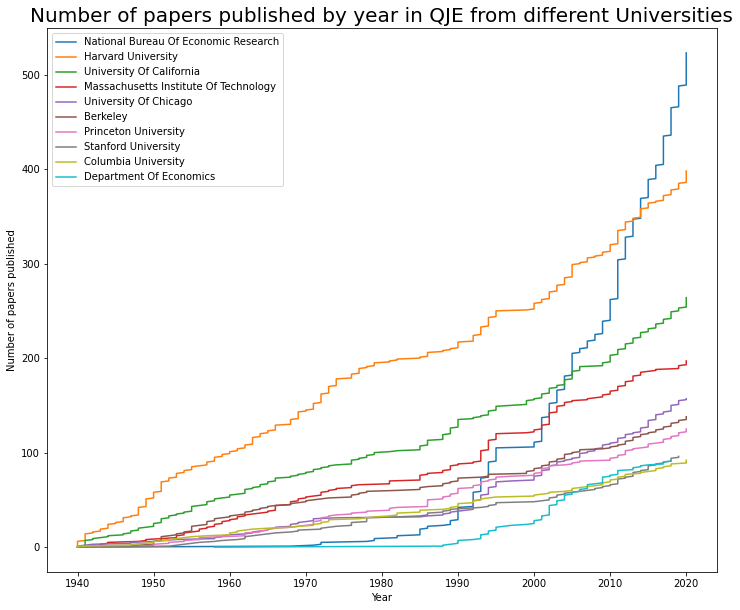

In [294]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,1])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,1])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,1])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,1])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,1])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,1])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,1])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,1])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,1])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,1])

plt.title('Number of papers published by year in QJE from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()